# Introduction

The purpose of the project is to analyse tweets to determine peoples viees or sentiment on climate change. Sentiment analysis is the interpretation and classification of emotions, within text data, utilising text analysis techniques. The prediction would aid companies on providing robust solutions and marketing strategies based on customers sentiment

**Contents**
1. Importing Packages
2. Importing datasets
3. Exploratory Data Analysis
4. Text pre-processing
5. Splitting the data
6. Vector Transformation
7. Creating and Evaluating the model
8. CSV submission

# Import Packages

In [1]:
#utility packages
import re
import numpy as np
import pandas as pd
import emoji
import string

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#set plt style
sns.set()

The datasets imported are the train and test datasets for this competition. It contains tweets and tweet_ids  

The train dataset consists of 15819 rows with three columns (sentiment, message and tweetid)

The test dataset consists of  10546 rows with two columns ( message and tweetid)

In [2]:
train_data = pd.read_csv("climate_change_train.csv")
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
print(train_data.shape)
train_data.info()

(15819, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [4]:
test_data = pd.read_csv("climate_change_test.csv")
test_data.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
print(test_data.shape)
test_data.info()

(10546, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


# Exploratory Data Analysis

Count the number of words in each dataset

To identify the number of words in each tweet 

In [6]:
def num_of_words(df):
    train_data['word_count'] = train_data['message'].apply(lambda x : len(str(x).split(" ")))
    print(train_data[['message','word_count']].head())

num_of_words(train_data)

                                             message  word_count
0  PolySciMajor EPA chief doesn't think carbon di...          19
1  It's not like we lack evidence of anthropogeni...          10
2  RT @RawStory: Researchers say we have three ye...          19
3  #TodayinMaker# WIRED : 2016 was a pivotal year...          15
4  RT @SoyNovioDeTodas: It's 2016, and a racist, ...          18


In [7]:
def num_of_words(df):
    test_data['word_count'] = test_data['message'].apply(lambda x : len(str(x).split(" ")))
    print(test_data[['message','word_count']].head())
    
num_of_words(train_data)

                                             message  word_count
0  Europe will now be looking to China to make su...          20
1  Combine this with the polling of staffers re c...          20
2  The scary, unimpeachable evidence that climate...          14
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...          23
4  RT @FakeWillMoore: 'Female orgasms cause globa...           8


Frequency of each word in a tweet

In [8]:
#generate a word frequency
def gen_freq(text):
    #store the list of words
    word_list=[]
    
    #Loop over all the tweets and extract wotds into a word_list
    for tw_words in text.split():
        word_list.extend(tw_words)
        
    #create word frequencies using a word list
    word_freq = pd.Series(word_list).value_counts()
    
    #Print top 5 words
    word_freq[:5]
    
    return word_freq

gen_freq(train_data.message.str)

climate                    12170
RT                          9706
change                      8865
to                          7066
the                         6397
                           ...  
https://t.co/fYjebKJWJ3        1
@WuMingi:                      1
idts                           1
29.                            1
@fabionodariph:                1
Length: 47508, dtype: int64

In [9]:
#generate a word frequency
def gen_freq(text):
    #store the list of words
    word_list=[]
    
    #Loop over all the tweets and extract wotds into a word_list
    for tw_words in text.split():
        word_list.extend(tw_words)
        
    #create word frequencies using a word list
    word_freq = pd.Series(word_list).value_counts()
    
    #Print top 5 words
    word_freq[:5]
    
    return word_freq

gen_freq(test_data.message.str)

climate                    8157
RT                         6367
change                     5931
to                         4738
the                        4293
                           ... 
Friendly                      1
appointment                   1
https://t.co/tZZ0MrgruE       1
time.”                        1
@MrSilverScott                1
Length: 35460, dtype: int64

Sentiment analysis of the train and test datasets

In [10]:
temp = train_data.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


[Text(0, 0, 'Negative'),
 Text(1, 0, 'Neutral'),
 Text(2, 0, 'Positive'),
 Text(3, 0, 'Compound')]

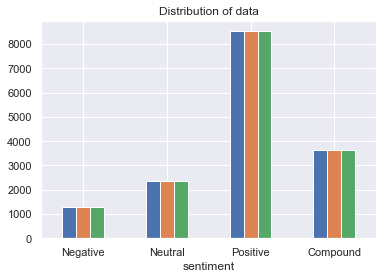

In [11]:
# Plotting the distribution for train dataset.
ax = train_data.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive','Compound'], rotation=0)

In [12]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(train_data.loc[0]['message'])

{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.2244}

From the above visualisation, the positive sentiment is much higher than the negative sentiment.

Before we performa any preprocessing the two data frames will be concatenated

In [13]:
df= pd.concat([train_data, test_data], sort = True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26365 entries, 0 to 10545
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   message     26365 non-null  object 
 1   sentiment   15819 non-null  float64
 2   tweetid     26365 non-null  int64  
 3   word_count  26365 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
# concatenated dataframe stats
df.describe()

,sentiment,tweetid,word_count
count,15819.000000,26365.000000,26365.000000
mean,0.917504,499791.634971,17.622113
std,0.836537,288678.408660,4.422867
min,-1.000000,6.000000,1.000000
25%,1.000000,249928.000000,15.000000
50%,1.000000,499577.000000,18.000000
75%,1.000000,748695.000000,21.000000
max,2.000000,999983.000000,31.000000


# Text Data Preprocessing

Text preprocessing is essential to transform the text into a format that improves the performance of the machine learning algorithm 

The following steps were executed for text preprocessing

1. Fill in missing values in the test_data dataframe sentiment column
2. Defining a dictionary of stop words in english
3. Assign all text in lower case
4. Replacing all websites
5. Removal of @mention
6. Removal of punctuation in the data
7. Removal of numeric charecters
8. Removal of emoji's
9. Remove short words

In [15]:
# filling in the missing values in the dataframe, replaced with sentiment score of 0- neutral
df['sentiment'].fillna(0, inplace = True)

Defining a dictionary of stop words in English

In [16]:
#defining a list containing all stopwords in english
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

All text in lower case

In [17]:
#lowercase text
df['message'] = df['message'].str.lower()

print(df['message'].iloc[0])

polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via @mashable


Removal of website and url's, punctuation, non alpha numeric charecters, separate the words with a single space

In [18]:
def clean_text(message):
    line = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",message).split()
    return " ".join (line)

df['message']=df['message'].apply(lambda x: clean_text(x))

print(df['message'].iloc[0])
print(df['message'].iloc[3])

polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what via
todayinmaker wired 2016 was a pivotal year in the war on climate change


Removal of numeric charecters

In [19]:
# remove numeric charecters
def only_words(message):
    line=re.findall(r'\b[^\d\W]+\b', message)
    return " ".join(line)

df['message']=df['message'].apply(lambda x : only_words(x))

print(df['message'].iloc[3])

todayinmaker wired was a pivotal year in the war on climate change


Removal of emoji's

In [20]:
#find emoji and remove it:
def remove_emoji(message):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', message)

print (df['message'].iloc[15])

rt i don t wanna live forever and nothing will because climate change


Removing Shortwords

In [21]:
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

print(df['message'].iloc[4])

racist sexist climate change denying bigot leading polls electionnight


Word Cloud demonstrating the words in the dataframe

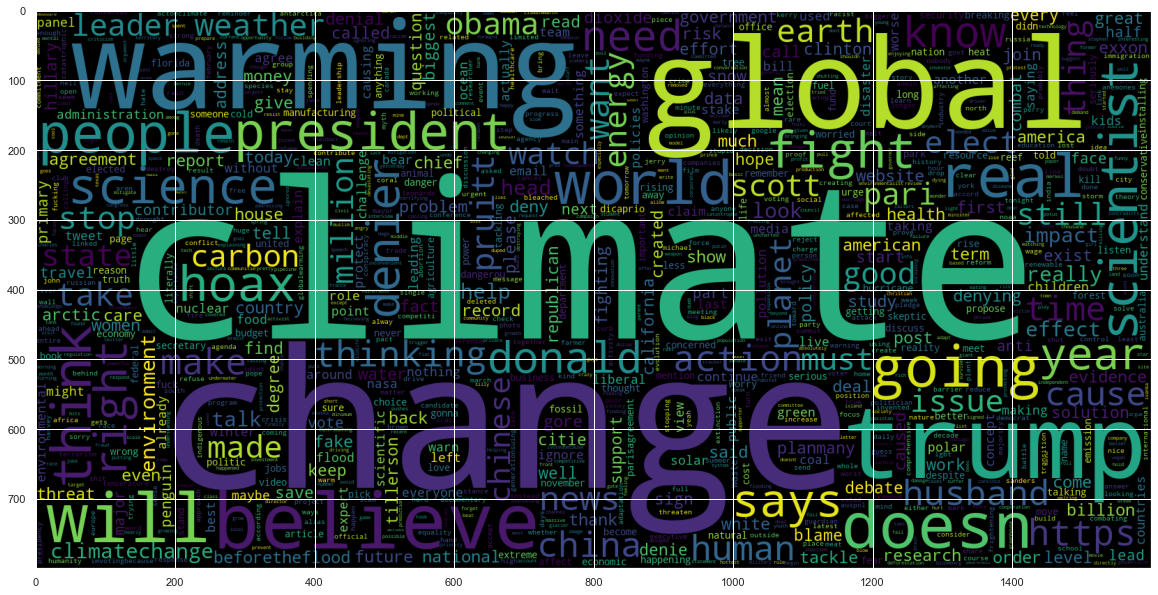

In [22]:
words = df['message']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(words))
plt.imshow(wc)

In [23]:
df.head()

,message,sentiment,tweetid,word_count
0,polyscimajor chief doesn think carbon dioxide ...,1.0,625221,19
1,like lack evidence anthropogenic global warming,1.0,126103,10
2,researchers have three years climate change be...,2.0,698562,19
3,todayinmaker wired pivotal year climate change,1.0,573736,15
4,racist sexist climate change denying bigot lea...,1.0,466954,18


In [24]:
df.drop(['word_count'], axis = 1)

,message,sentiment,tweetid
0,polyscimajor chief doesn think carbon dioxide ...,1.0,625221
1,like lack evidence anthropogenic global warming,1.0,126103
2,researchers have three years climate change be...,2.0,698562
3,todayinmaker wired pivotal year climate change,1.0,573736
4,racist sexist climate change denying bigot lea...,1.0,466954
...,...,...,...
10541,writing poem about climate change climatechang...,0.0,895714
10542,year climate change came home during hottest y...,0.0,875167
10543,vanuatu pacific countries positive about fiji ...,0.0,78329
10544,must cause global warming aldublaboroflove,0.0,867455


# Splitting the data

Splitting the two concatenated dataframes

In [25]:
y = df[:len(train_data)][['sentiment']]
yt = df[len(train_data):][['sentiment']]
X = df[:len(train_data)].drop('sentiment', axis =1)['message']
Xt = df[len(train_data):].drop('sentiment', axis =1)

In [26]:
#Xt= df.drop('word_count', axis =1)
#X= df.drop('word_count', axis =1)
#y = df.drop()

In [27]:
Xt.shape

(10546, 3)

In [28]:
#X

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import classification_report, accuracy_score

from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")

# Vector Transformation

Text feature extraction is used to convert the text data into a matrix(or vector) of features. The count vectorizer converts a collection of documents (rows of text) into a matrix of token counts.

The following parameters are applies to fine tune the vector:

Stop words, specified as 'english'- any words in this list will be removed
n_gram range- The lower and upper boundary ranges of n-values for different n-grams to be extracted
max_df - When building the vocabulary, ignores terms that have a document frequency higher than the given threshold
min_df - When buidling the vocabulary, ignore terms that have a document frequency lower than the given threshold

In [30]:
#vectorizer = CountVectorizer()
#vectorizer = CountVectorizer()
#countvectorizer = vectorizer.fit_transform(X_train)

In [31]:
#process columns apply LabelEncoder to categorical features
lbl= LabelEncoder()
X_t = lbl.fit_transform(X.values)

In [32]:
X_t

array([8103, 6247, 8815, ..., 7402, 6207, 1310])

In [33]:
X_train,X_test, y_train,y_test = train_test_split(X,y, 
                                                  test_size =0.2, 
                                                  shuffle = True, 
                                                  stratify = y, 
                                                  random_state =10)

In [45]:
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit(X)
countvectorizer =countvectorizer.transform(X_train)
countvectorizer.shape

(12655, 14313)

In [39]:
X_train

12574    climate change deniers anti choice supporters ...
6955     trump robbing time have left fight climate cha...
8966     suburbs increasingly threatened wildfires clim...
8848     allegations change fundamental understanding c...
7519     thinking about going because your husband does...
                               ...                        
11352    unlike president believe climate change blame ...
1384     there discussions about beliefs regarding clim...
7657     magazine rogue twitter accounts spring fight d...
205         china tells trump climate change hoax invented
3117     facts there genders global warming made real w...
Name: message, Length: 12655, dtype: object

# Creating and evaluating the model

In [40]:
parameters ={'kernel':('linear','rbf'),
            'C':(0.25 ,1.0),
            'gamma':(1,2)}

In [41]:
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(countvectorizer,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': (0.25, 1.0), 'gamma': (1, 2),
                         'kernel': ('linear', 'rbf')})

In [46]:
testvector = vectorizer.transform(X_test)
testvector.shape

(3164, 14313)

In [47]:
lin_svc= clf.predict(testvector)
accuracy_score(y_test,lin_svc)

0.7130214917825537

In [48]:
print('Full Model')
print(classification_report(y_test, lin_svc))

Full Model
              precision    recall  f1-score   support

        -1.0       0.71      0.37      0.49       259
         0.0       0.52      0.39      0.45       471
         1.0       0.75      0.85      0.79      1706
         2.0       0.72      0.73      0.72       728

    accuracy                           0.71      3164
   macro avg       0.67      0.58      0.61      3164
weighted avg       0.70      0.71      0.70      3164



Getting our test set ready

In [75]:
vectorizer = CountVectorizer()
count_vectorizer = vectorizer.fit(X,y_test)
count_vectorizer = vectorizer.transform(Xt['message'].values)
print(count_vectorizer.toarray())
count_vectorizer.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(10546, 14313)

Making predictions on the test set and adding a sentiment column to our original test df

In [76]:
pred_unseen = clf.predict(count_vectorizer)

In [77]:
output_csv = pd.DataFrame(columns=['tweetid', 'sentiment'])
output_csv['tweetid'] = Xt['tweetid']
output_csv['sentiment'] = pred_unseen
output_csv['sentiment'] = output_csv['sentiment'].astype(int)
output_csv.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [78]:
from IPython.display import FileLink
FileLink('testsubmission.csv')

C:\Users\27737\testsubmission.csv